# NEW MODEL

In [64]:
import tensorflow as tf

In [65]:
root = "DatasetsV4"
train_dir = root+"/train"
test_dir = root+"/test"
valid_dir = root+"/valid"

In [66]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.5,
    zoom_range=0.5,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [67]:
BATCH = 128
IMG_SIZE = (150,150)

train_gen = train_datagen.flow_from_directory(
	train_dir,
	target_size=(IMG_SIZE),
	class_mode='categorical',
  	batch_size=BATCH
)

valid_gen = valid_datagen.flow_from_directory(
	valid_dir,
	target_size=(IMG_SIZE),
	class_mode='categorical',
  	batch_size=BATCH
)

Found 5566 images belonging to 9 classes.
Found 706 images belonging to 9 classes.


In [68]:
from PIL import Image
import matplotlib.pyplot as plt
import os

def plot_images(folder):
    subfolders = [f.path for f in os.scandir(folder) if f.is_dir()]
    _, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
    for i, subfolder in enumerate(subfolders):
        filenames = os.listdir(subfolder)
        image_path = os.path.join(subfolder, filenames[4])
        image = Image.open(image_path)
        image = image.resize((150,150))
        ax = axes[i // 5, i % 5]
        ax.imshow(image)
        ax.set_title(os.path.basename(subfolder))
        ax.axis("off")

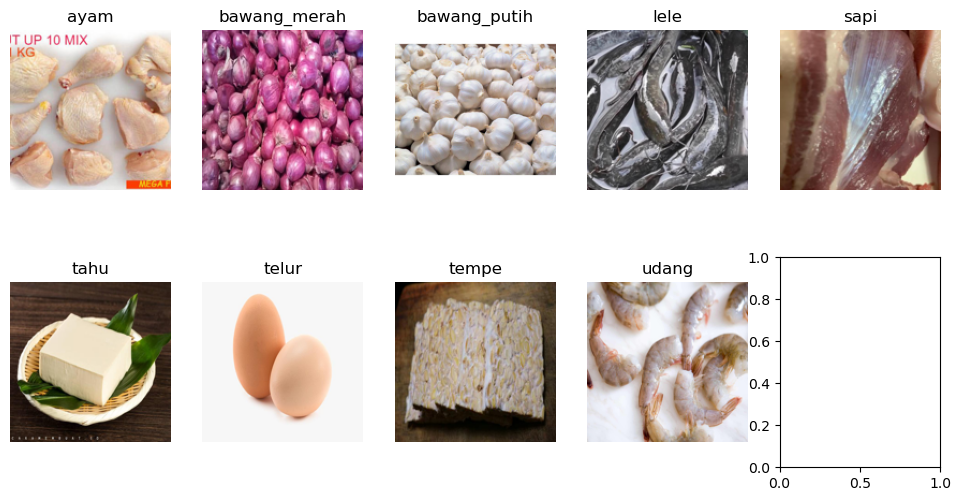

In [69]:
plot_images(train_dir)

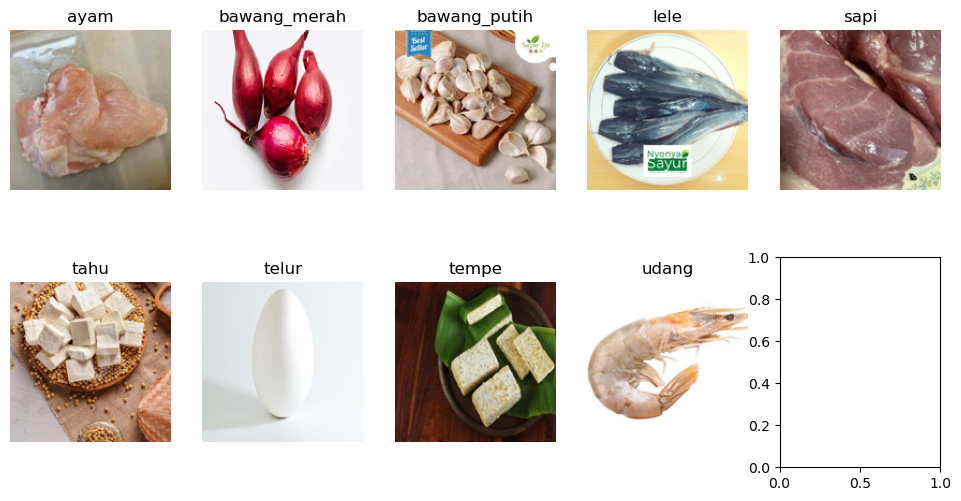

In [70]:
plot_images(valid_dir)

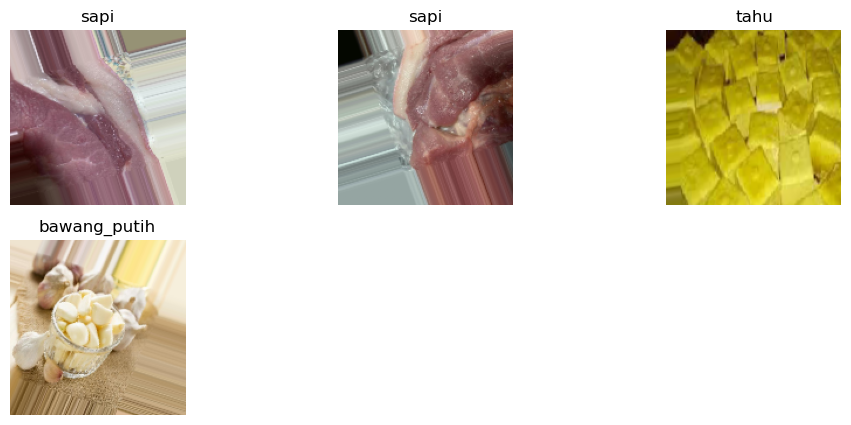

In [71]:
import numpy as np
import matplotlib.pyplot as plt
n = 4
plt.figure(figsize=(12, 5))

for i in range(0,n):
    x,y = train_gen.next()
    image_x = x[0,:,:,:]
    ax = plt.subplot(2, 3, i + 1)
    # label = y[0]
    # label= np.where(y[0]==1)[0]
    label= list(train_gen.class_indices)[np.where(y[0]==1)[0][0]]
    plt.title(label)
    plt.imshow(image_x)
    plt.axis("off")

In [72]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(150,150,3),
                                               include_top=False,
                                               weights='imagenet',
                                               classifier_activation="relu")

base_model.trainable = False

# model3 = tf.keras.Sequential([
#     # Note the input shape is the desired size of the image 300x300 with 3 bytes color
#     # This is the first convolution
#     tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     # The second convolution
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The third convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # Flatten the results to feed into a DNN
#     tf.keras.layers.Flatten(),
#     # 512 neuron hidden layer
#     tf.keras.layers.Dense(512, activation='relu'),
#     # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])

# base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 16)          184336    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 1, 16)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 16)                0         
                                                                 
 dense_6 (Dense)             (None, 512)               8704      
                                                                 
 dense_7 (Dense)             (None, 9)                

In [73]:
initial_epochs = 5


history = model.fit(train_gen,
                    epochs=initial_epochs,
                    steps_per_epoch=20,
                    validation_data=valid_gen,
                    validation_steps=5
                    )

Epoch 1/5
20/20 [==============================] - 79s 4s/step - loss: 2.2170 - accuracy: 0.2820 - val_loss: 1.7839 - val_accuracy: 0.3844
Epoch 2/5
20/20 [==============================] - 71s 4s/step - loss: 1.3048 - accuracy: 0.5316 - val_loss: 1.3049 - val_accuracy: 0.5219
Epoch 3/5
20/20 [==============================] - 69s 3s/step - loss: 1.0166 - accuracy: 0.6540 - val_loss: 0.6105 - val_accuracy: 0.7781
Epoch 4/5
20/20 [==============================] - 79s 4s/step - loss: 0.7479 - accuracy: 0.7312 - val_loss: 0.5716 - val_accuracy: 0.7672
Epoch 5/5
20/20 [==============================] - 84s 4s/step - loss: 0.7516 - accuracy: 0.7355 - val_loss: 0.6406 - val_accuracy: 0.7719


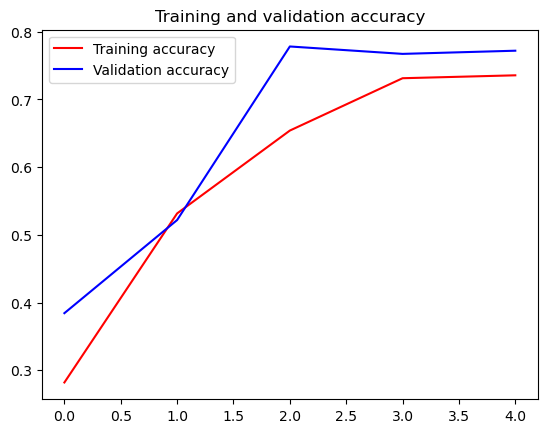

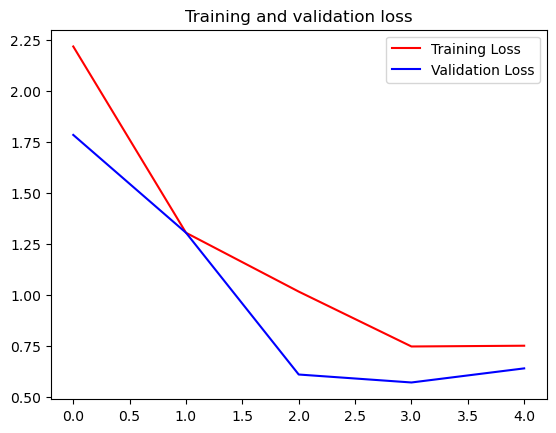

In [74]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [75]:
# sunflower_path = 'SampleDatasets/test2.jpg'

# img = tf.keras.utils.load_img(
#     sunflower_path, target_size=(150, 150)
# )
# img_array = tf.keras.utils.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0) # Create a batch

# predictions = model3.predict(img_array)
# score = tf.nn.softmax(predictions[0])

# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score)], 100 * np.max(score))
# )

In [76]:
test_gen = valid_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE)
)

Found 687 images belonging to 9 classes.


In [77]:
predictions = model.predict(test_gen)
predictions

22/22 [==============================] - 15s 591ms/step


array([[6.0034412e-01, 4.4975101e-04, 1.6863355e-04, ..., 2.2133098e-03,
        1.5397889e-02, 3.4188117e-05],
       [2.7958019e-02, 6.8837538e-02, 8.1587108e-03, ..., 1.3184618e-03,
        1.1803133e-02, 1.3563155e-01],
       [1.1414961e-01, 1.4431272e-01, 5.7836527e-01, ..., 1.5782580e-02,
        1.0055500e-02, 9.1247179e-02],
       ...,
       [1.5475420e-08, 9.9999392e-01, 5.2335821e-07, ..., 2.8283506e-07,
        1.4635369e-06, 3.9063952e-08],
       [7.4318878e-02, 4.3128154e-01, 1.1776396e-01, ..., 3.8502891e-02,
        1.6508374e-01, 3.6935166e-02],
       [1.0962874e-02, 1.4190883e-03, 5.7836686e-04, ..., 1.6239978e-04,
        9.9582020e-03, 1.4716342e-01]], dtype=float32)

In [82]:
class_names = list(train_gen.class_indices)
print(train_gen.class_indices)
img_dir='DatasetsV4/train/ayam/'
    
correct = 0
for i,img in enumerate(os.listdir(img_dir)):   
    sunflower_path = img_dir + img

    img = tf.keras.utils.load_img(
        sunflower_path, target_size=(150, 150)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    if(class_names[np.argmax(score)]=="ayam"): correct += 1
    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )

print("Jumlah data benar", correct)

{'ayam': 0, 'bawang_merah': 1, 'bawang_putih': 2, 'lele': 3, 'sapi': 4, 'tahu': 5, 'telur': 6, 'tempe': 7, 'udang': 8}
1/1 [==============================] - 0s 49ms/step
This image most likely belongs to bawang_merah with a 17.45 percent confidence.
1/1 [==============================] - 0s 55ms/step
This image most likely belongs to tahu with a 14.54 percent confidence.
1/1 [==============================] - 0s 49ms/step
This image most likely belongs to tahu with a 20.56 percent confidence.
1/1 [==============================] - 0s 39ms/step
This image most likely belongs to tahu with a 13.77 percent confidence.
1/1 [==============================] - 0s 46ms/step
This image most likely belongs to telur with a 15.03 percent confidence.
1/1 [==============================] - 0s 48ms/step
This image most likely belongs to tahu with a 20.14 percent confidence.
1/1 [==============================] - 0s 53ms/step
This image most likely belongs to telur with a 14.66 percent confidence.
1/1